In [58]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [59]:
dataset = pd.read_csv('heart_attack.csv')
columns_to_keep = ["age", "trestbps", "heart_disease"]

columns_to_drop = [col for col in dataset.columns if col not in columns_to_keep]
dataset.drop(columns=columns_to_drop, inplace=True)

first_column = dataset.pop(dataset.columns[0])
dataset.insert(2, first_column.name, first_column)

X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [61]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [62]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [63]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1))

[[0 0]
 [0 0]
 [0 1]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [1 0]
 [1 1]
 [0 0]
 [0 1]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 1]
 [0 1]
 [0 0]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]]


In [64]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[27 12]
 [24 12]]


In [65]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.52


In [66]:
coefficients = classifier.coef_
intercept = classifier.intercept_

print("Logistic Regression Equation:")
print(f"y = {intercept[0]:.4f} + ({coefficients[0][0]:.4f} * Age) + ({coefficients[0][1]:.4f} * Resting Blood Pressure)")

Logistic Regression Equation:
y = -0.1966 + (0.4720 * Age) + (0.2834 * Resting Blood Pressure)


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


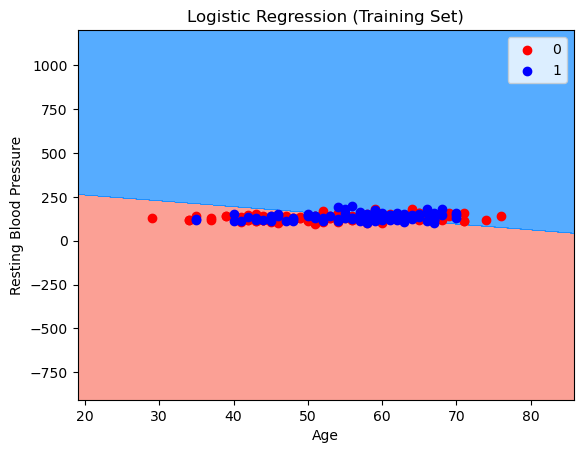

In [67]:
from matplotlib.colors import ListedColormap

X_set, y_set = sc.inverse_transform(X_train), y_train

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10,
                              stop = X_set[:, 0].max()+10,
                              step = 0.25),
                    np.arange(start = X_set[:, 1].min() - 1000,
                             stop = X_set[:, 1].max() + 1000,
                             step = 0.25))

plt.contourf(X1, X2,
             classifier.predict(sc.transform(np.array([X1.ravel(),
                                                      X2.ravel()]).T)).reshape(X1.shape),
            alpha = 0.75,
            cmap = ListedColormap(('salmon', 'dodgerblue')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0],
                X_set[y_set ==j, 1],
               c = ListedColormap(('red', 'blue'))(i),
               label = j)
plt.title('Logistic Regression (Training Set)')
plt.xlabel('Age')
plt.ylabel('Resting Blood Pressure')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


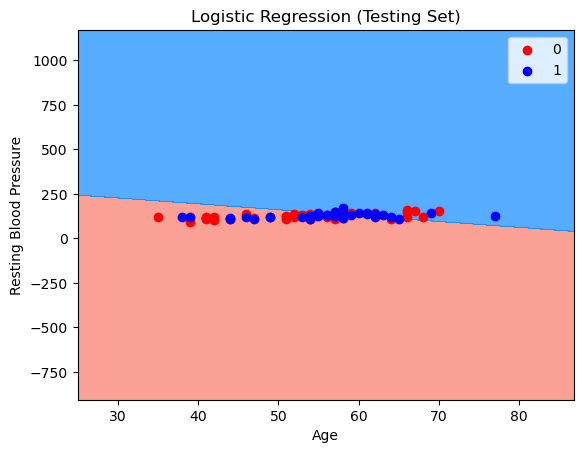

In [68]:
from matplotlib.colors import ListedColormap

X_set, y_set = sc.inverse_transform(X_test), y_test

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10,
                              stop = X_set[:, 0].max() + 10,
                              step = 0.25),
                    np.arange(start = X_set[:, 1].min() - 1000,
                             stop = X_set[:, 1].max() + 1000,
                             step = 0.25))

plt.contourf(X1, X2,
            classifier.predict(sc.transform(np.array([X1.ravel(),
                                                     X2.ravel()]).T)).reshape(X1.shape),
            alpha = 0.75,
            cmap = ListedColormap(('salmon', 'dodgerblue')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0],
               X_set[y_set == j, 1],
               c = ListedColormap(('red', 'blue'))(i),
               label = j)
    
plt.title('Logistic Regression (Testing Set)')
plt.xlabel('Age')
plt.ylabel('Resting Blood Pressure')
plt.legend()
plt.show()

In [69]:
dataset = pd.read_csv('heart_attack.csv')
columns_to_keep = ["chol", "thalach", "heart_disease"]

columns_to_drop = [col for col in dataset.columns if col not in columns_to_keep]
dataset.drop(columns=columns_to_drop, inplace=True)

first_column = dataset.pop(dataset.columns[0])
dataset.insert(2, first_column.name, first_column)

X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [71]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [72]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [73]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1))

[[0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [1 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 0]
 [0 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 1]
 [0 1]
 [1 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 1]
 [1 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [0 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]]


In [74]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[27 12]
 [14 22]]


In [75]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.65


In [76]:
coefficients = classifier.coef_
intercept = classifier.intercept_

print("Logistic Regression Equation:")
print(f"y = {intercept[0]:.4f} + ({coefficients[0][0]:.4f} * Cholesterol Level) + ({coefficients[0][1]:.4f} * Max Heart Rate)")

Logistic Regression Equation:
y = -0.1923 + (0.2269 * Cholesterol Level) + (-1.0354 * Max Heart Rate)


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


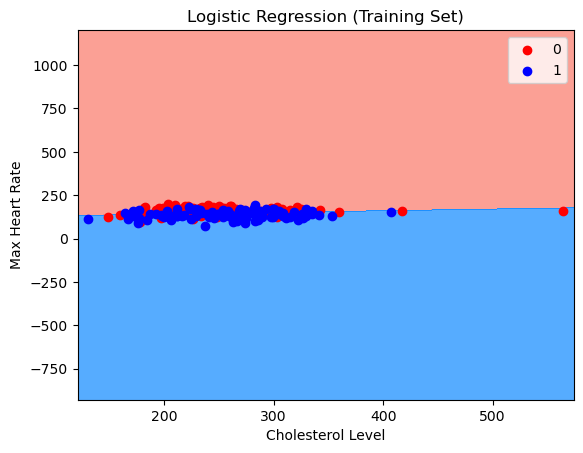

In [77]:
from matplotlib.colors import ListedColormap

X_set, y_set = sc.inverse_transform(X_train), y_train

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10,
                              stop = X_set[:, 0].max()+10,
                              step = 0.25),
                    np.arange(start = X_set[:, 1].min() - 1000,
                             stop = X_set[:, 1].max() + 1000,
                             step = 0.25))

plt.contourf(X1, X2,
             classifier.predict(sc.transform(np.array([X1.ravel(),
                                                      X2.ravel()]).T)).reshape(X1.shape),
            alpha = 0.75,
            cmap = ListedColormap(('salmon', 'dodgerblue')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0],
                X_set[y_set ==j, 1],
               c = ListedColormap(('red', 'blue'))(i),
               label = j)
plt.title('Logistic Regression (Training Set)')
plt.xlabel('Cholesterol Level')
plt.ylabel('Max Heart Rate')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


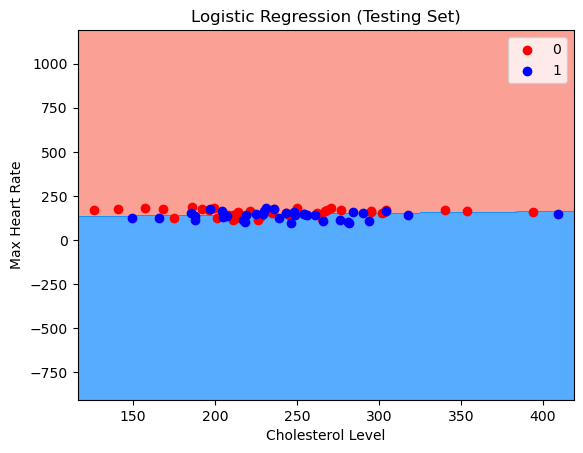

In [78]:
from matplotlib.colors import ListedColormap

X_set, y_set = sc.inverse_transform(X_test), y_test

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10,
                              stop = X_set[:, 0].max() + 10,
                              step = 0.25),
                    np.arange(start = X_set[:, 1].min() - 1000,
                             stop = X_set[:, 1].max() + 1000,
                             step = 0.25))

plt.contourf(X1, X2,
            classifier.predict(sc.transform(np.array([X1.ravel(),
                                                     X2.ravel()]).T)).reshape(X1.shape),
            alpha = 0.75,
            cmap = ListedColormap(('salmon', 'dodgerblue')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0],
               X_set[y_set == j, 1],
               c = ListedColormap(('red', 'blue'))(i),
               label = j)
    
plt.title('Logistic Regression (Testing Set)')
plt.xlabel('Cholesterol Level')
plt.ylabel('Max Heart Rate')
plt.legend()
plt.show()

In [79]:
dataset = pd.read_csv('heart_attack.csv')
columns_to_keep = ["trestbps", "chol", "heart_disease"]

columns_to_drop = [col for col in dataset.columns if col not in columns_to_keep]
dataset.drop(columns=columns_to_drop, inplace=True)

first_column = dataset.pop(dataset.columns[0])
dataset.insert(2, first_column.name, first_column)

X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [80]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [81]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [82]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [83]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1))

[[0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [1 0]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [0 0]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [1 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 1]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [1 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]]


In [84]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[33  6]
 [32  4]]


In [85]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.49


In [86]:
coefficients = classifier.coef_
intercept = classifier.intercept_

print("Logistic Regression Equation:")
print(f"y = {intercept[0]:.4f} + ({coefficients[0][0]:.4f} * Resting Blood Presure) + ({coefficients[0][1]:.4f} * Cholesterol Level)")

Logistic Regression Equation:
y = -0.1850 + (0.3686 * Resting Blood Presure) + (0.1484 * Cholesterol Level)


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


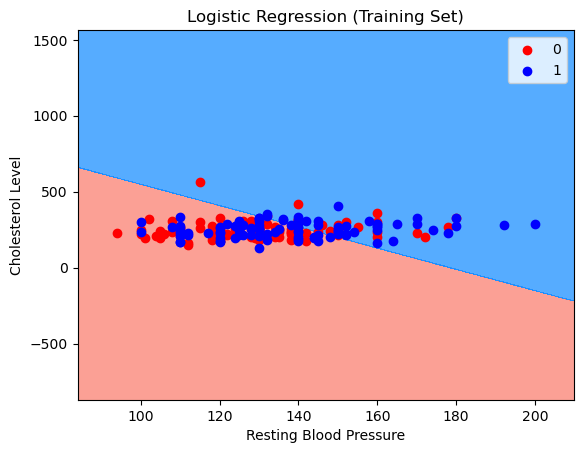

In [87]:
from matplotlib.colors import ListedColormap

X_set, y_set = sc.inverse_transform(X_train), y_train

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10,
                              stop = X_set[:, 0].max()+10,
                              step = 0.25),
                    np.arange(start = X_set[:, 1].min() - 1000,
                             stop = X_set[:, 1].max() + 1000,
                             step = 0.25))

plt.contourf(X1, X2,
             classifier.predict(sc.transform(np.array([X1.ravel(),
                                                      X2.ravel()]).T)).reshape(X1.shape),
            alpha = 0.75,
            cmap = ListedColormap(('salmon', 'dodgerblue')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0],
                X_set[y_set ==j, 1],
               c = ListedColormap(('red', 'blue'))(i),
               label = j)
plt.title('Logistic Regression (Training Set)')
plt.xlabel('Resting Blood Pressure')
plt.ylabel('Cholesterol Level')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


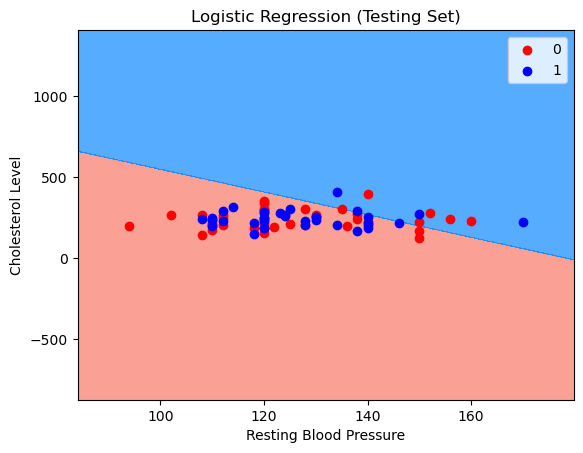

In [88]:
from matplotlib.colors import ListedColormap

X_set, y_set = sc.inverse_transform(X_test), y_test

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10,
                              stop = X_set[:, 0].max() + 10,
                              step = 0.25),
                    np.arange(start = X_set[:, 1].min() - 1000,
                             stop = X_set[:, 1].max() + 1000,
                             step = 0.25))

plt.contourf(X1, X2,
            classifier.predict(sc.transform(np.array([X1.ravel(),
                                                     X2.ravel()]).T)).reshape(X1.shape),
            alpha = 0.75,
            cmap = ListedColormap(('salmon', 'dodgerblue')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0],
               X_set[y_set == j, 1],
               c = ListedColormap(('red', 'blue'))(i),
               label = j)
    
plt.title('Logistic Regression (Testing Set)')
plt.xlabel('Resting Blood Pressure')
plt.ylabel('Cholesterol Level')
plt.legend()
plt.show()

In [89]:
dataset = pd.read_csv('heart_attack.csv')
columns_to_keep = ["trestbps", "thalach", "heart_disease"]

columns_to_drop = [col for col in dataset.columns if col not in columns_to_keep]
dataset.drop(columns=columns_to_drop, inplace=True)

first_column = dataset.pop(dataset.columns[0])
dataset.insert(2, first_column.name, first_column)

X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [90]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [91]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [92]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [93]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1))

[[0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 0]
 [0 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [1 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [1 1]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 1]
 [1 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [1 1]
 [1 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]]


In [94]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[29 10]
 [17 19]]


In [95]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.64


In [96]:
coefficients = classifier.coef_
intercept = classifier.intercept_

print("Logistic Regression Equation:")
print(f"y = {intercept[0]:.4f} + ({coefficients[0][0]:.4f} * Resting Blood Pressure) + ({coefficients[0][1]:.4f} * Max Heart Rate)")

Logistic Regression Equation:
y = -0.1888 + (0.4159 * Resting Blood Pressure) + (-1.0388 * Max Heart Rate)


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


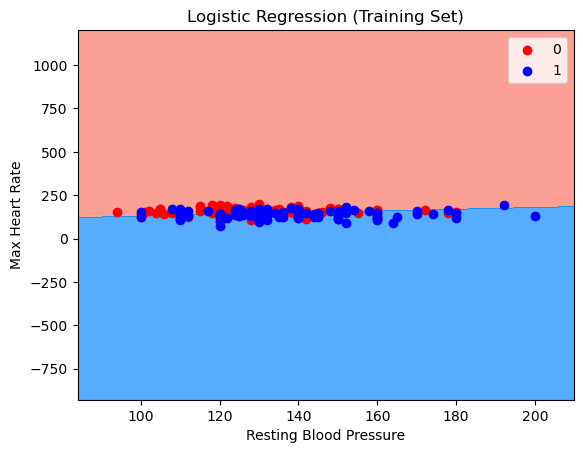

In [97]:
from matplotlib.colors import ListedColormap

X_set, y_set = sc.inverse_transform(X_train), y_train

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10,
                              stop = X_set[:, 0].max()+10,
                              step = 0.25),
                    np.arange(start = X_set[:, 1].min() - 1000,
                             stop = X_set[:, 1].max() + 1000,
                             step = 0.25))

plt.contourf(X1, X2,
             classifier.predict(sc.transform(np.array([X1.ravel(),
                                                      X2.ravel()]).T)).reshape(X1.shape),
            alpha = 0.75,
            cmap = ListedColormap(('salmon', 'dodgerblue')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0],
                X_set[y_set ==j, 1],
               c = ListedColormap(('red', 'blue'))(i),
               label = j)
plt.title('Logistic Regression (Training Set)')
plt.xlabel('Resting Blood Pressure')
plt.ylabel('Max Heart Rate')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


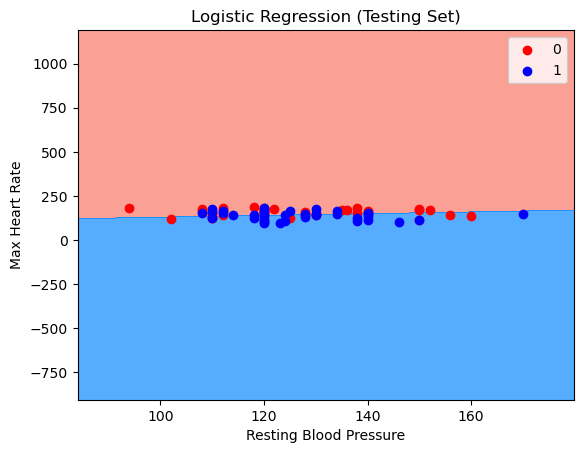

In [98]:
from matplotlib.colors import ListedColormap

X_set, y_set = sc.inverse_transform(X_test), y_test

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10,
                              stop = X_set[:, 0].max() + 10,
                              step = 0.25),
                    np.arange(start = X_set[:, 1].min() - 1000,
                             stop = X_set[:, 1].max() + 1000,
                             step = 0.25))

plt.contourf(X1, X2,
            classifier.predict(sc.transform(np.array([X1.ravel(),
                                                     X2.ravel()]).T)).reshape(X1.shape),
            alpha = 0.75,
            cmap = ListedColormap(('salmon', 'dodgerblue')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0],
               X_set[y_set == j, 1],
               c = ListedColormap(('red', 'blue'))(i),
               label = j)
    
plt.title('Logistic Regression (Testing Set)')
plt.xlabel('Resting Blood Pressure')
plt.ylabel('Max Heart Rate')
plt.legend()
plt.show()

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset
dataset = pd.read_csv('heart_attack.csv')

# Select the columns for independent variables and the target variable
columns_to_keep = ["age", "trestbps", "chol", "thalach", "heart_disease"]
dataset = dataset[columns_to_keep]

# Split the dataset into independent variables (X) and the target variable (y)
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Standardize the independent variables
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Create and train the logistic regression model
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

In [9]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[28 11]
 [16 20]]


In [10]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.64


In [11]:
coefficients = classifier.coef_
intercept = classifier.intercept_

print("Logistic Regression Equation:")
print(f"y = {intercept[0]:.4f} + ({coefficients[0][0]:.4f} * Age) + ({coefficients[0][1]:.4f} * Resting Blood Pressure) + ({coefficients[0][2]:.4f} * Cholesterol) + ({coefficients[0][3]:.4f} * Max Heart Rate)")

Logistic Regression Equation:
y = -0.1969 + (0.0756 * Age) + (0.3765 * Resting Blood Pressure) + (0.1669 * Cholesterol) + (-1.0164 * Max Heart Rate)


Principal Component Loadings:
               PC1       PC2       PC3
age      -0.671152 -0.142609  0.035212
trestbps -0.406851  0.483683 -0.735106
chol     -0.331844  0.628834  0.669324
thalach   0.523361  0.591846 -0.101908


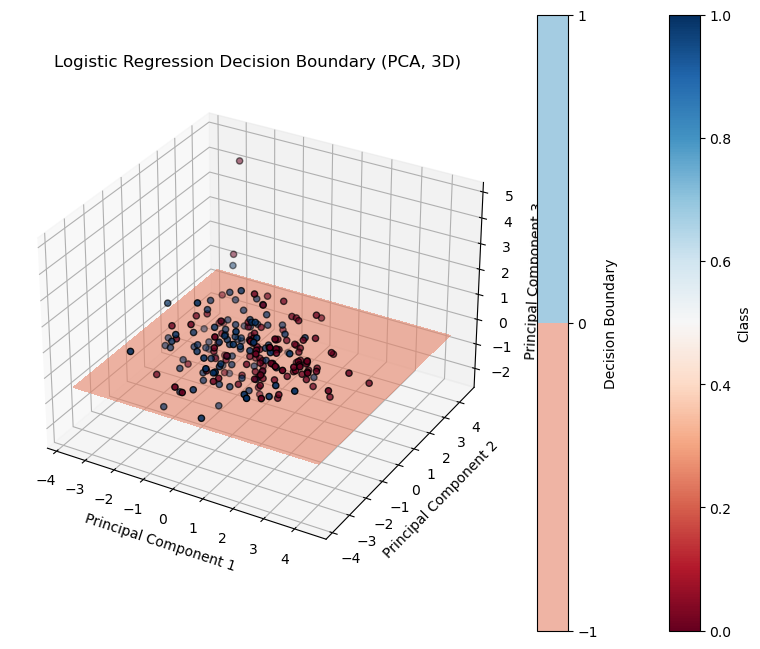

In [12]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Load the dataset
dataset = pd.read_csv('heart_attack.csv')

# Select the columns for independent variables and the target variable
columns_to_keep = ["age", "trestbps", "chol", "thalach", "heart_disease"]
dataset = dataset[columns_to_keep]

# Split the dataset into independent variables (X) and the target variable (y)
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Standardize the independent variables
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Apply PCA for dimensionality reduction to 3D
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train)  # Apply PCA to the original data
X_test_pca = pca.transform(X_test)

# Create and train the logistic regression model
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train_pca, y_train)

# Get the explained variance ratios of each principal component
explained_var_ratios = pca.explained_variance_ratio_

# Get the loadings (directions) of the principal components
loadings = pca.components_

# Map the loadings back to the original feature names
feature_names = dataset.columns[:-1]
loadings_df = pd.DataFrame(loadings.T, columns=[f'PC{i+1}' for i in range(pca.n_components_)], index=feature_names)

# Print the loadings
print("Principal Component Loadings:")
print(loadings_df)

# Create a 3D plot for PC1 vs. PC2 vs. PC3
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the data points in 3D
scatter = ax.scatter(X_train_pca[:, 0], X_train_pca[:, 1], X_train_pca[:, 2], c=y_train, cmap=plt.cm.RdBu, edgecolor='k')

# Set labels and title
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.title('Logistic Regression Decision Boundary (PCA, 3D)')

# Create a mesh grid for the decision boundary plot in the 2D plane
h = .02  # Step size in the mesh
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict on the mesh grid using the new classifier
Z = classifier.predict(np.c_[xx.ravel(), yy.ravel(), np.zeros_like(xx.ravel())])

# Plot the decision boundary (2D) on the 3D plot
contour = ax.contourf(xx, yy, np.zeros_like(xx), Z.reshape(xx.shape), cmap=plt.cm.RdBu, alpha=0.6, levels=[-1, 0, 1])

# Add a colorbar which maps values to colors
plt.colorbar(scatter, label='Class')
plt.colorbar(contour, label='Decision Boundary')

# Show the 3D plot
plt.show()